In [1]:
import numpy as np
import pandas as pd
import altair as alt


In [46]:
def n01(x):
    return (x - x.min()) / (x.max() - x.min())

def salary(spd, yrs):
    q1 = 1.0 / spd * np.random.normal(1.0, 0.02, size=N)
    q1 = n01(q1)
    q2 = n01(yrs) * np.random.normal(1.0, 0.01, size=N)
    q3 = q1 + 12 * q1 / (0.3 + np.abs(q2-0.3))
    return n01(q3) * 1.8 + 0.20

In [50]:
N = 400
np.random.seed(123)
spd = np.random.normal(20,2., size=N)
yrs = np.random.triangular(1,3,10, size=N)
d = pd.DataFrame(data={
    '100m dash (s)': spd,
    'Years experience': yrs,
    'salary': salary(spd, yrs),
})

In [51]:
d[:10]

,100m dash (s),Years experience,salary
0,17.828739,1.038392,0.741796
1,21.994691,8.894393,0.361475
2,20.565957,7.281713,0.475226
3,16.987411,7.747616,0.703538
4,18.842799,3.931781,0.974128
5,23.302873,5.988862,0.350252
6,15.146642,2.957286,1.564342
7,19.142175,3.812525,1.004282
8,22.531873,6.941819,0.399187
9,18.266519,2.515592,0.945925


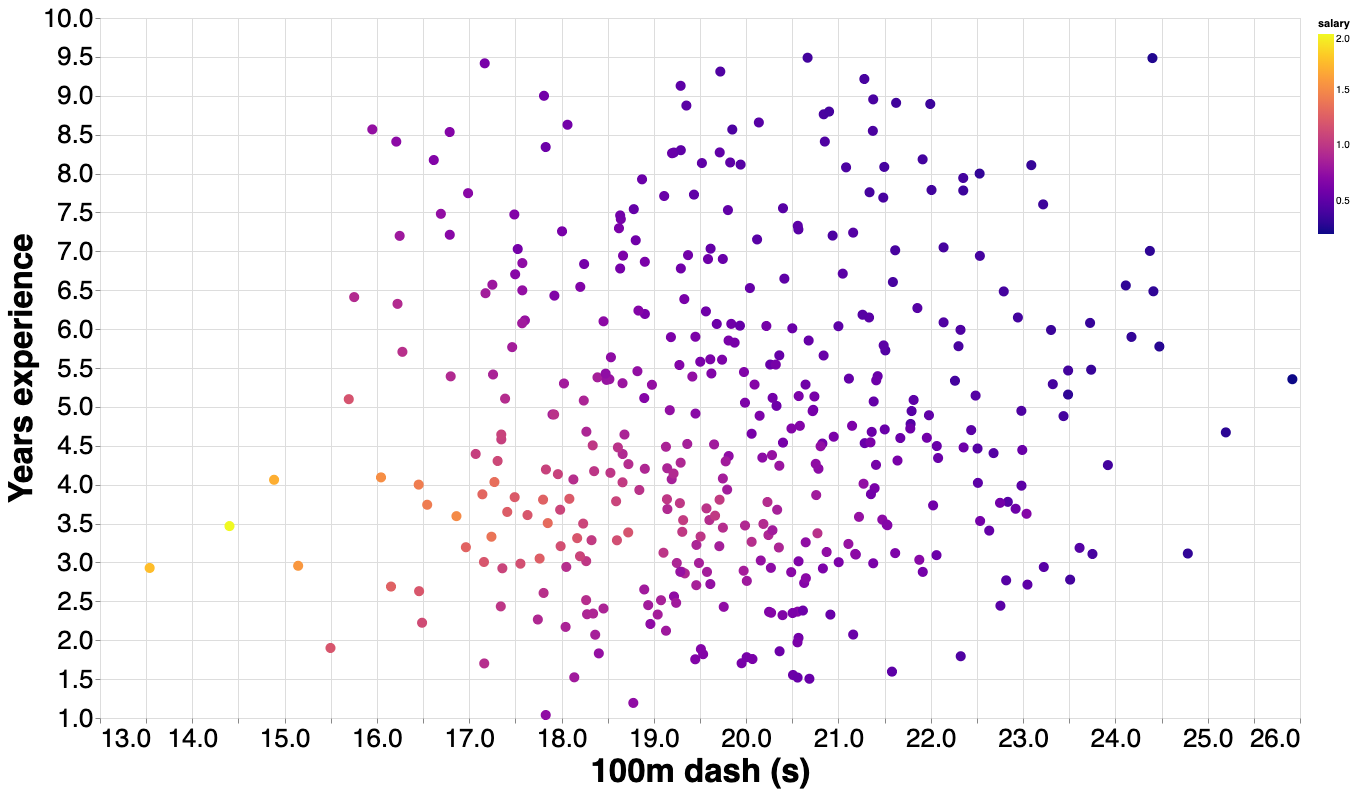

In [52]:
alt.Chart(data=d,
          height=700,
          width=1200,
).configure_axis(
    domain=False,
    labelFontSize=26,
    titleFontSize=33,
).mark_point(
    size=100,
    opacity=1.0,
    filled=True,
).encode(
    alt.X('100m dash (s)',
          scale=alt.Scale(zero=False),
         ),
    alt.Y('Years experience',
          scale=alt.Scale(zero=False),
         ),
    color=alt.Color('salary', scale=alt.Scale(scheme='plasma'))
)